# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [12]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# Step 2: set up the time and solution arrays
N = 2000
time = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)

# Step 3: set up the initial conditions
x[0] = A
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for i in range(N-1):
    time[i+1] = time[i] + dt
    a[i] = -k*x[i]/m 
    v[i+1] = v[i] + a[i]*dt
    x[i+1] = x[i] + v[i]*dt

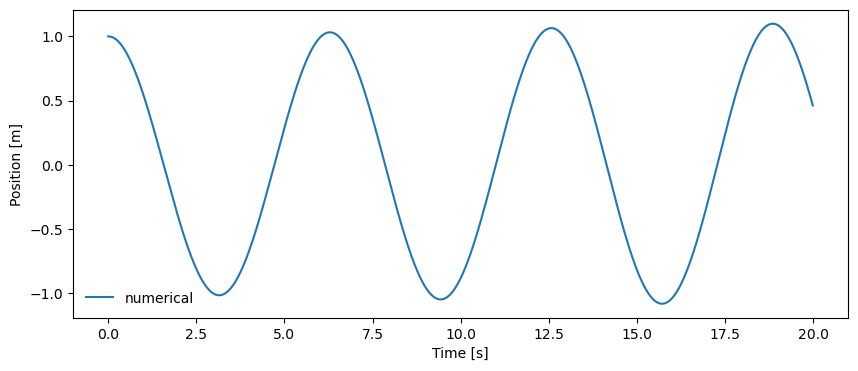

In [22]:
# Step 5: plot the solution
plt.figure(0,figsize=(10,4))
plt.plot(time,x,label='numerical')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(loc='best',frameon=False)

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

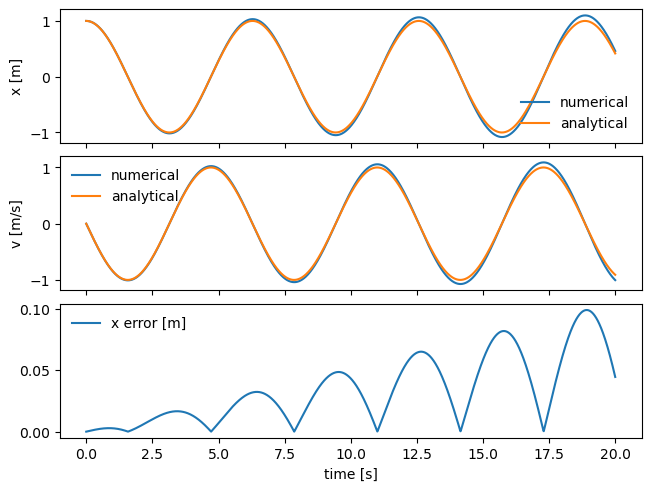

In [23]:
# Step 6: evaluate the analytical solution and plot it
x_ana = A*np.cos(omega0*time)
v_ana = -A*omega0*np.sin(omega0*time)

fig,axs = plt.subplots(3,1,sharex=True,layout='constrained')
axs[0].plot(time,x,label='numerical')
axs[0].plot(time,x_ana,label='analytical')
axs[0].set_ylabel('x [m]')
axs[0].legend(frameon=False)
axs[1].plot(time,v,label='numerical')
axs[1].plot(time,v_ana,label='analytical')
axs[1].set_ylabel('v [m/s]')
axs[2].set_xlabel('time [s]')
axs[1].legend(frameon=False)
axs[2].plot(time,np.abs(x-x_ana),label='x error [m]')
axs[2].legend(frameon=False)
plt.show()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

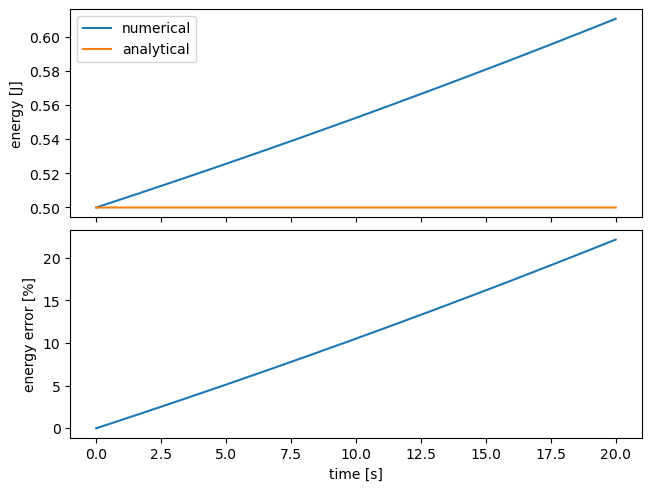

In [16]:
# Step 7: evaluate the energy (error) of the system
energy = 0.5*m*v**2 + 0.5*k*x**2
energy_ana = 0.5*m*v_ana**2 + 0.5*k*x_ana**2
energy_error = np.abs(energy-energy_ana)

fig,axs = plt.subplots(2,1,sharex=True,layout='constrained')
axs[0].plot(time,energy,label='numerical')
axs[0].plot(time,energy_ana,label='analytical')
axs[0].set_ylabel('energy [J]')
axs[0].legend(frameon=False)
axs[1].plot(time,energy_error/energy_ana*100)
axs[1].set_ylabel('energy error [%]')
axs[1].set_xlabel('time [s]')
plt.show()

Text(0.5, 1.0, 'Phase diagram')

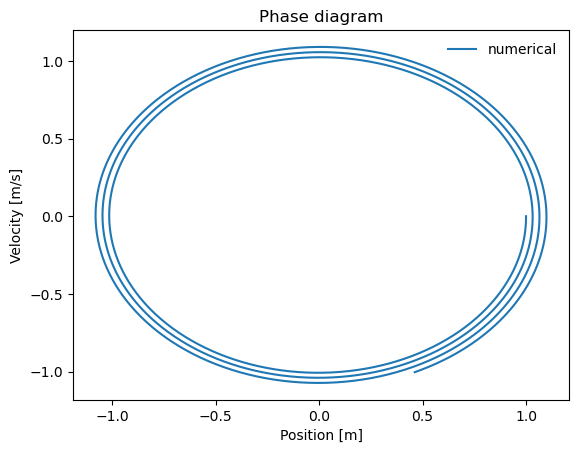

In [24]:
# Step 8: evaluate the phase space
plt.plot(x,v,label='numerical')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(loc='best',frameon=False)
plt.title('Phase diagram')

## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

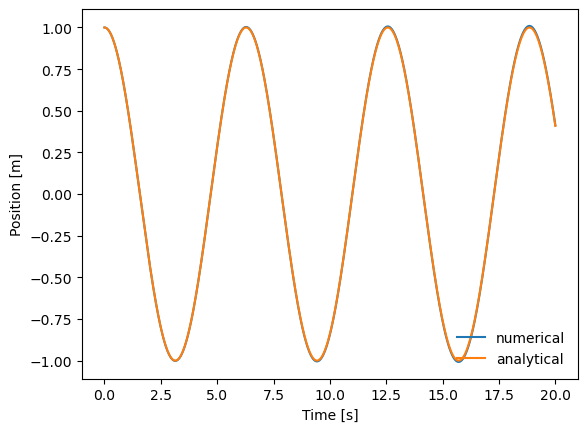

<Figure size 640x480 with 0 Axes>

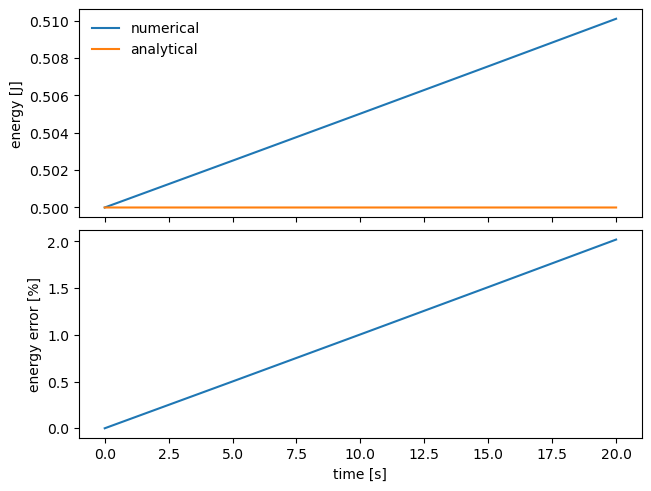

In [28]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt2 = 0.001

# Step 2: set up the time and solution arrays
N = 20000
time2 = np.zeros(N)
x2 = np.zeros(N)
v2 = np.zeros(N)
a2 = np.zeros(N)

# Step 3: set up the initial conditions
x2[0] = A
v2[0] = 0

# Step 4: solve the difference equation using the Euler method
for i in range(N-1):
    time2[i+1] = time2[i] + dt2
    a2[i] = -k*x2[i]/m 
    v2[i+1] = v2[i] + a2[i]*dt2
    x2[i+1] = x2[i] + v2[i]*dt2

# analytical solution
x_ana2 = A*np.cos(omega0*time2)
v_ana2 = -A*omega0*np.sin(omega0*time2)

# Step 5: plot the solution
plt.figure(1)
plt.plot(time2,x2,label='numerical')
plt.plot(time2,x_ana2,label='analytical')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(loc='lower right',frameon=False)

# Step 7: evaluate the energy (error) of the system
plt.figure(2)
energy2 = 0.5*m*v2**2 + 0.5*k*x2**2
energy_ana2 = 0.5*m*v_ana2**2 + 0.5*k*x_ana2**2
energy_error2 = np.abs((energy2-energy_ana2)/energy_ana2)*100
fig,axs = plt.subplots(2,1,sharex=True,layout='constrained')
axs[0].plot(time2,energy2,label='numerical')
axs[0].plot(time2,energy_ana2,label='analytical')
axs[0].set_ylabel('energy [J]')
axs[0].legend(loc='best',frameon=False)
axs[1].plot(time2,energy_error2)
axs[1].set_ylabel('energy error [%]')
axs[1].set_xlabel('time [s]')
plt.show()

### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 